# Introduction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from scipy.stats import pearsonr

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

In [12]:
data = pd.read_csv("/content/diabetes_binary_health_indicators_BRFSS2015.csv")

In [13]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [14]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


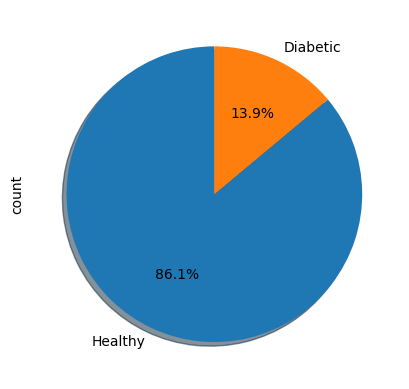

In [15]:
labels = 'Healthy','Diabetic'

data.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

In [16]:
#aykırı değerleri eleme
data = data[
    (data['BMI'].between(12, 60)) &
    (data['GenHlth'].between(1, 5)) &
    (data['PhysHlth'].between(0, 30)) &
    (data['MentHlth'].between(0, 30))
].drop_duplicates().dropna()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228669 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       228669 non-null  float64
 1   HighBP                228669 non-null  float64
 2   HighChol              228669 non-null  float64
 3   CholCheck             228669 non-null  float64
 4   BMI                   228669 non-null  float64
 5   Smoker                228669 non-null  float64
 6   Stroke                228669 non-null  float64
 7   HeartDiseaseorAttack  228669 non-null  float64
 8   PhysActivity          228669 non-null  float64
 9   Fruits                228669 non-null  float64
 10  Veggies               228669 non-null  float64
 11  HvyAlcoholConsump     228669 non-null  float64
 12  AnyHealthcare         228669 non-null  float64
 13  NoDocbcCost           228669 non-null  float64
 14  GenHlth               228669 non-null  float64
 15  MentH

burada göreceğimiz üzere diabetes_binary çok dengesiz bu yüzden modellerin doğruluğunu arttırmak adına veri setini dengelemeye çalışacacğız

In [18]:
df_features = data.drop("Diabetes_binary",axis=1)
df_target = data["Diabetes_binary"]

In [19]:
df_target.value_counts()

,count
Diabetes_binary,
0.0,193743
1.0,34926


In [20]:
nm = NearMiss(version = 1 , n_neighbors = 10)

df_features, df_target = nm.fit_resample(df_features, df_target)

In [21]:
df_features.shape , df_target.shape

((69852, 21), (69852,))

In [22]:
data.duplicated().sum()

np.int64(0)

In [23]:
data.drop_duplicates(inplace = True)

In [24]:
data.duplicated().sum()

np.int64(0)

In [25]:
threshold = 10

### benzer ifadeler ile öznitelik seçimi

In [26]:
high_score_features_mic = []
feature_scores = mutual_info_classif(df_features, df_target, random_state=0)
for score, f_name in sorted(zip(feature_scores, df_features.columns), reverse=True)[:threshold]:
        high_score_features_mic.append(f_name)

print(high_score_features_mic)

['PhysHlth', 'GenHlth', 'MentHlth', 'Income', 'DiffWalk', 'BMI', 'Education', 'PhysActivity', 'HighBP', 'HeartDiseaseorAttack']


### Pearson ile öznitelik tahmini

In [27]:
pearson_list = []
for l in list(df_features.columns):
    p,_ = pearsonr(df_features[l], df_target)
    pearson_list.append(abs(p))

p_value=pd.Series(pearson_list,index=df_features.columns)
p_value.sort_values(ascending=False,inplace=True)
high_score_features_pearson = list(p_value.index[:threshold])
print(high_score_features_pearson)

['GenHlth', 'PhysHlth', 'Income', 'DiffWalk', 'MentHlth', 'BMI', 'PhysActivity', 'Education', 'HighBP', 'HeartDiseaseorAttack']


### hem benzerde hem pearsonda bulunanlar

In [28]:
high_score_features = []
for h in  high_score_features_mic:
    if h in high_score_features_pearson:
        high_score_features.append(h)

print(high_score_features)

['PhysHlth', 'GenHlth', 'MentHlth', 'Income', 'DiffWalk', 'BMI', 'Education', 'PhysActivity', 'HighBP', 'HeartDiseaseorAttack']


ayrıca kendi seçimlerimizi de test etmek istedik

In [29]:
y = df_target

features_list = [
    ["all",df_features],

    ["mic 5", df_features[high_score_features_mic[:5]]],
    ["mic 7", df_features[high_score_features_mic[:7]]],
    ["mic 10", df_features[high_score_features_mic]],

    ["pearson 5", df_features[high_score_features_pearson[:5]]],
    ["pearson 7", df_features[high_score_features_pearson[:7]]],
    ["pearson 10", df_features[high_score_features_pearson]],

    ["best of mic&pear", df_features[high_score_features]],

    ["choose 3", df_features[['BMI','Age','HighBP']]],
    ["choose 5", df_features[['BMI','Age','HighBP','Smoker','MentHlth']]],
    ["choose 7", df_features[['BMI','Age','HighBP','Smoker','MentHlth', 'PhysHlth','GenHlth']]],

]

# Data Scale

In [30]:
scalar = StandardScaler()
data = []

for name, X in features_list:
    data.append([name, scalar.fit_transform(X)])


In [31]:
splited_data = []
for name, X in data:
    X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)
    splited_data.append({
            'name': name ,'X_train': X_train,
            'X_test':X_test,'y_train':y_train,
            'y_test':y_test
        })

# Modelleme

In [42]:
evaluations = pd.DataFrame()

burada aşama aşama ne çalışıyor ne çalıştırılıyor hangi sürede çalışıyor gözlemlenebilmesi için grafik ekledik ayrıca

In [43]:
data = splited_data[0]
pred_list = []
for data in tqdm(splited_data):
    fs = data["name"]
    models =[
        ['LR', LogisticRegression(), data],
        ['RF', RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'), data]
    ]

    roc_list = []
    accuracy_list = []
    f1_list = []
    recall_list = []
    precision_list = []

    for name ,model, data in tqdm(models):
        X_train, X_test, y_train, y_test= data['X_train'], data['X_test'], data['y_train'], data['y_test']
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:,1]

        pred_list.append({
            "model": name,
            "fs": fs,
            "data": y_pred
        })

        roc_list.append(metrics.roc_auc_score(y_test,y_pred))

        y_pred = [0 if (y<0.5)else 1 for y in y_pred]

        accuracy_list.append(metrics.accuracy_score(y_test,y_pred))
        f1_list.append(metrics.f1_score(y_test,y_pred))
        recall_list.append(metrics.recall_score(y_test,y_pred))
        precision_list.append(metrics.precision_score(y_test,y_pred))

    names = [name for name ,_ ,_ in models]
    fsm = [data['name'] for _ ,_ ,data in models]
    evaluation = pd.DataFrame({'classifiers': names,'Feature selection method': fsm ,'AUC Score': roc_list, 'Accuracy':accuracy_list,'Precision':precision_list,'Recall':recall_list, 'F-measure':f1_list})

    evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

    evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
    print(evaluation)

  9%|▉         | 1/11 [00:13<02:17, 13.80s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                      all   0.913913  0.841382   0.941846   
0          LR                      all   0.913034  0.850639   0.913809   

     Recall  F-measure  
1  0.727307   0.820789  
0  0.773935   0.838076  



 18%|█▊        | 2/11 [00:23<01:41, 11.25s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                    mic 5   0.892792  0.830597   0.934101   
0          LR                    mic 5   0.890066  0.830216   0.903674   

     Recall  F-measure  
1  0.709142   0.806223  
0  0.736893   0.811806  



 27%|██▋       | 3/11 [00:33<01:27, 10.98s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                    mic 7   0.904246  0.838757   0.936207   
0          LR                    mic 7   0.900669  0.838042   0.895899   

     Recall  F-measure  
1  0.725197   0.817302  
0  0.763001   0.824127  



 36%|███▋      | 4/11 [00:46<01:21, 11.59s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                   mic 10   0.909963  0.837803   0.942663   
0          LR                   mic 10   0.908349  0.842957   0.903633   

     Recall  F-measure  
1  0.722658   0.818128  
0  0.771150   0.832152  



 45%|████▌     | 5/11 [00:55<01:04, 10.79s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                pearson 5   0.893381  0.829977   0.927307   
0          LR                pearson 5   0.890945  0.829738   0.898057   

     Recall  F-measure  
1  0.712247   0.805672  
0  0.739923   0.811357  



 55%|█████▍    | 6/11 [01:05<00:52, 10.42s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                pearson 7   0.898634  0.835990   0.937910   
0          LR                pearson 7   0.896943  0.835847   0.893388   

     Recall  F-measure  
1  0.716199   0.812196  
0  0.759083   0.820777  



 64%|██████▎   | 7/11 [01:18<00:44, 11.23s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF               pearson 10   0.909853  0.839521   0.938408   
0          LR               pearson 10   0.909010  0.842861   0.898424   

     Recall  F-measure  
1  0.724962   0.817990  
0  0.771297   0.830021  



 73%|███████▎  | 8/11 [01:30<00:34, 11.65s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF         best of mic&pear   0.909113  0.840284   0.940025   
0          LR         best of mic&pear   0.908408  0.845724   0.900089   

     Recall  F-measure  
1  0.726002   0.819267  
0  0.776821   0.833924  



 82%|████████▏ | 9/11 [01:39<00:21, 10.72s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                 choose 3   0.734894  0.665537   0.702776   
0          LR                 choose 3   0.706109  0.646975   0.653026   

     Recall  F-measure  
1  0.569718   0.629291  
0  0.622007   0.637139  



 91%|█████████ | 10/11 [01:50<00:10, 10.74s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                 choose 5   0.813242  0.731771   0.854260   
0          LR                 choose 5   0.797279  0.728336   0.788206   

     Recall  F-measure  
1  0.560369   0.676787  
0  0.626166   0.697904  



100%|██████████| 11/11 [02:01<00:00, 11.04s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                 choose 7   0.890905  0.825873   0.933511   
0          LR                 choose 7   0.883957  0.817093   0.885008   

     Recall  F-measure  
1  0.701404   0.800982  
0  0.728532   0.799183  


In [44]:
evaluations = evaluations.sort_values(by='AUC Score', ascending=False, ignore_index=True)
pd.set_option("display.max_rows", None)
evaluations

,classifiers,Feature selection method,AUC Score,Accuracy,Precision,Recall,F-measure
0,RF,all,0.913913,0.841382,0.941846,0.727307,0.820789
1,LR,all,0.913034,0.850639,0.913809,0.773935,0.838076
2,RF,mic 10,0.909963,0.837803,0.942663,0.722658,0.818128
3,RF,pearson 10,0.909853,0.839521,0.938408,0.724962,0.817990
4,RF,best of mic&pear,0.909113,0.840284,0.940025,0.726002,0.819267
5,LR,pearson 10,0.909010,0.842861,0.898424,0.771297,0.830021
6,LR,best of mic&pear,0.908408,0.845724,0.900089,0.776821,0.833924
7,LR,mic 10,0.908349,0.842957,0.903633,0.771150,0.832152
8,RF,mic 7,0.904246,0.838757,0.936207,0.725197,0.817302
9,LR,mic 7,0.900669,0.838042,0.895899,0.763001,0.824127


## The best model is Random Forest with 10 feature (Pearson)

In [45]:
high_score_features_pearson

['GenHlth',
 'PhysHlth',
 'Income',
 'DiffWalk',
 'MentHlth',
 'BMI',
 'PhysActivity',
 'Education',
 'HighBP',
 'HeartDiseaseorAttack']

In [46]:
classifier = RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced')
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list(range(len(high_score_features_pearson)))),
    ])

model = Pipeline(steps=[
    ('precprocessor', preprocessor),
    ('classifier', classifier)
])

In [47]:
X = df_features[high_score_features_mic]
y = df_target
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train)

Pipeline(steps=[('precprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=1000))])

In [48]:
y_pred = model.predict_proba(X_test)[:,1]
score = metrics.roc_auc_score(y_test,y_pred)
score

np.float64(0.9080850683211439)